## Project 3 : SALES PREDICTION USING PYTHON


Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product. Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.

Sales prediction is a type of ***supervisied machine learning** problem. It is a prediction problem can be solved using Regression.

**Data loading and Data preprocessing**

In [1]:
#checking working directory and changing it

In [2]:
pwd

'C:\\Users\\vaish'

In [3]:
import os
os.chdir("E:\\JOB\\OASIS info\\Data_Science\\5.Sales_prediction")

In [4]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
#loading the dataset
data = pd.read_csv("Advertising.csv")

In [6]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


"Unnamed: 0" just giving the series number. Before we drop the column first checking if there is any null data in dataset or not. 

In [7]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
data = data.drop(columns = ['Unnamed: 0'])

In [9]:
data.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
data.duplicated().sum()

0

In [12]:
data.shape

(200, 4)

**Data cleaning , and preprocessing**

In [13]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Checking for datadistribution.

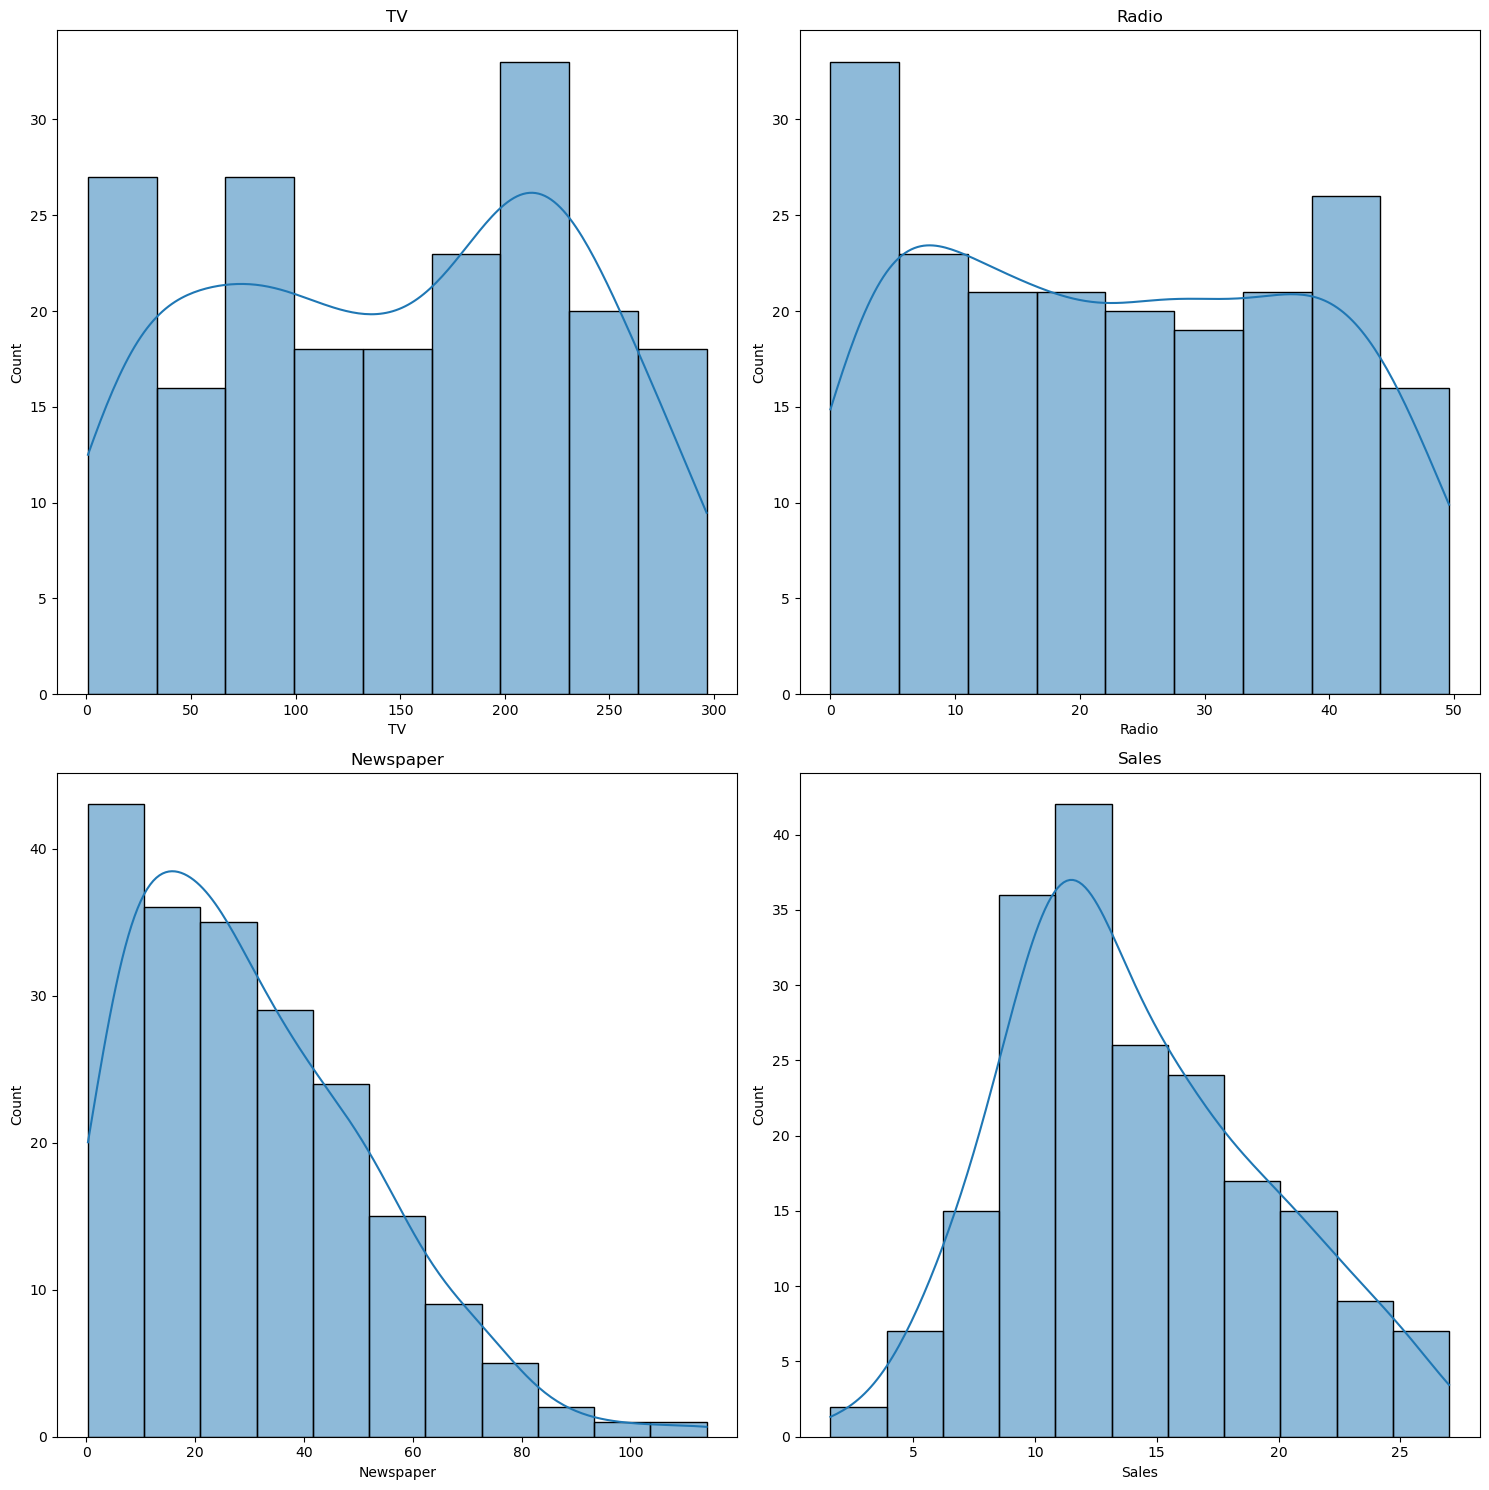

In [14]:
plt.figure(figsize=(15,15))
for i,col in enumerate(data.columns):
        plt.subplot(2,2,i+1)
        sns.histplot(data=data[col], kde=True)
        plt.title(col)
plt.tight_layout()
plt.show()

Checking for linear relation between each variable.

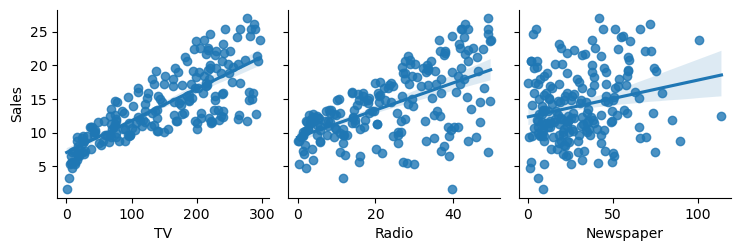

In [15]:
sns.pairplot(data, x_vars=['TV', 'Radio','Newspaper'], y_vars ='Sales', kind='reg')


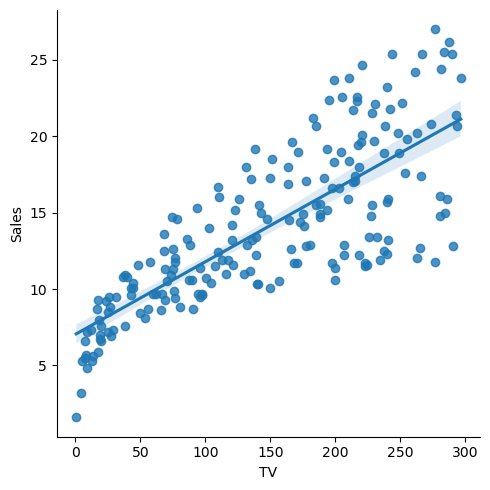

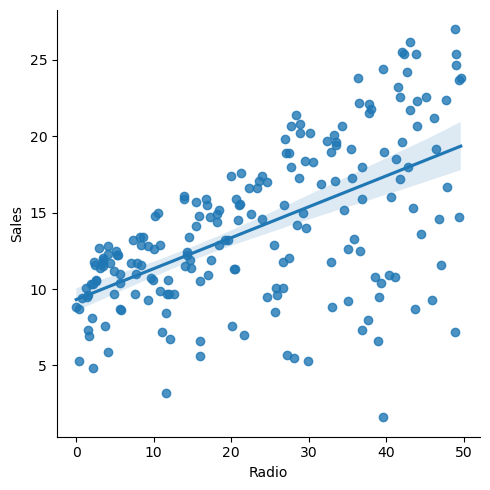

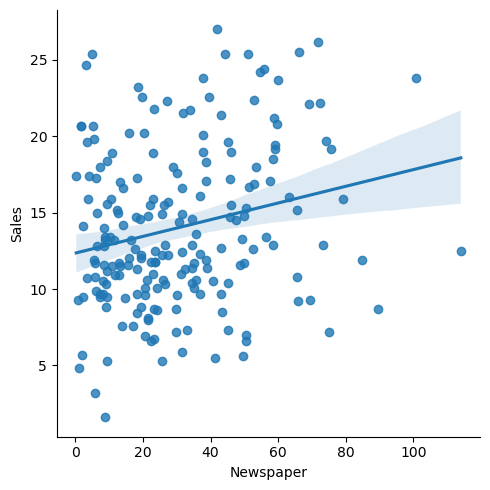

In [16]:
# Linear regression plots to visualize the relationship between each independent variable and the dependent variable
sns.lmplot(x='TV', y='Sales', data=data)
sns.lmplot(x='Radio', y='Sales', data=data)
sns.lmplot(x='Newspaper',y= 'Sales', data=data)

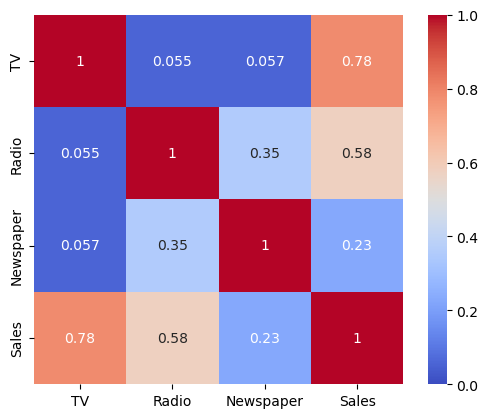

In [17]:
#correlation between variables
corr = data.corr()
sns.heatmap(corr, vmin=0, vmax=1, square = True, cmap='coolwarm', annot=True)
plt.show()

**Observation from Correlation heatmap**
1. Sales are  78% highly positively correlated with TV, 58% with Radio and 23% of Newspaper sales.
2. Sales are highly correlated with all the features.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (160, 3)
y_train shape: (160,)


In [22]:
# Initializing and training the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
#making prediction
y_pred = lr.predict(X_test)

In [24]:
# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [25]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Absolute Error: 1.4607567168117606
Mean Squared Error: 3.1740973539761046
Root Mean Squared Error: 1.7815996615334502
R-squared Score: 0.899438024100912


In [26]:
def generate_random_data():
    tv = np.random.uniform(0, 300)  # Random TV advertising expense between 0 and 300
    radio = np.random.uniform(0, 50)  # Random Radio advertising expense between 0 and 50
    newspaper = np.random.uniform(0, 100)  # Random Newspaper advertising expense between 0 and 100
    return tv, radio, newspaper


In [27]:
# Generate a random data point
tv, radio, newspaper = generate_random_data()
print("Random TV advertising expense:", tv)
print("Random Radio advertising expense:", radio)
print("Random Newspaper advertising expense:", newspaper)

Random TV advertising expense: 15.376679028410079
Random Radio advertising expense: 43.270039506654975
Random Newspaper advertising expense: 44.51528186620357


In [28]:
# Generate a random data point
tv, radio, newspaper = generate_random_data()

# Create a DataFrame with the random data point
random_data = pd.DataFrame({'TV': [tv], 'Radio': [radio], 'Newspaper': [newspaper]})

# Use the trained model to predict sales
predicted_sales = lr.predict(random_data)

In [29]:
print("Random TV advertising expense:", tv)
print("Random Radio advertising expense:", radio)
print("Random Newspaper advertising expense:", newspaper)
print("Predicted Sales:", predicted_sales[0])

Random TV advertising expense: 190.95181018689013
Random Radio advertising expense: 35.575616282496036
Random Newspaper advertising expense: 38.82308094250829
Predicted Sales: 18.35817528511476


## - Project by
Vaishnavi Patel